### Install

In [1]:
! pip install openpyxl

You should consider upgrading via the 'c:\users\u6094291\desktop\stockprice\stock\scripts\python.exe -m pip install --upgrade pip' command.


## Import the Package

In [1]:
import pandas as pd 
import numpy as np 

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px 

In [73]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.75,
    palette= "tab10",
    rc={        
        'figure.figsize': (8,4),
        'axes.grid': True,         
        'grid.alpha': .3,
        'axes.titlesize': 'large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 30,
        'axes.labelpad': 15,
    }
)

# A dictionary for customizing scatter plots
scatter_kwargs = dict(palette='bright', alpha=0.8, linewidth=0)

In [2]:
df = pd.read_excel("SP. Actual datset beginner.xlsx")

## First Impressions

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-08,262.832258,271.920063,259.979379,263.850566,192.174554,5.323711e+07
2013-01-10,270.260478,274.854361,268.282674,271.430867,197.040054,5.178378e+07
2013-01-11,274.427039,279.855234,274.088504,277.076790,202.063179,6.709850e+07
2013-01-18,274.629888,278.107366,273.503152,275.911624,200.255044,4.105676e+07
2013-01-25,275.250672,279.621220,274.238587,279.183702,201.170258,4.108447e+07


In [ ]:
df.sample(5)

In [ ]:
df.tail()

In [ ]:
df.info()

In [3]:
# Let's transform this in a time series.
df = df.set_index('Date')

# Creating Features

In [7]:
df['year']  = df.index.year
df['month'] = df.index.month 
# df['weekday_name'] = df.index.day_name()

In [ ]:
df.sample(5)

## First Visualization

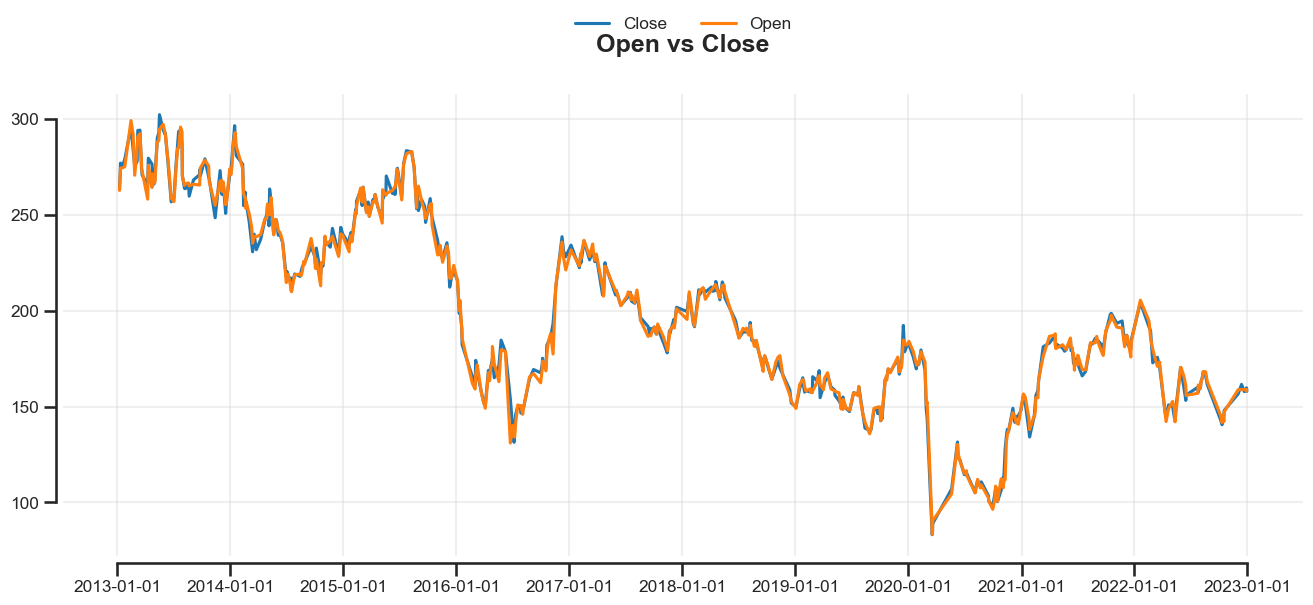

In [74]:
plt.figure(figsize=(16,6))
plt.plot(df.index,df['Close'], label= "Close")
plt.plot(df.index,df['Open'], label='Open')
plt.title("Open vs Close", fontsize=18)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, frameon=False)
sns.despine(trim=True, offset=5)
plt.show()

In [30]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,year,month
Date,,,,,,,,
2013-01-08,262.832258,271.920063,259.979379,263.850566,192.174554,5.323711e+07,2013,1
2013-01-10,270.260478,274.854361,268.282674,271.430867,197.040054,5.178378e+07,2013,1
2013-01-11,274.427039,279.855234,274.088504,277.076790,202.063179,6.709850e+07,2013,1
2013-01-18,274.629888,278.107366,273.503152,275.911624,200.255044,4.105676e+07,2013,1
2013-01-25,275.250672,279.621220,274.238587,279.183702,201.170258,4.108447e+07,2013,1


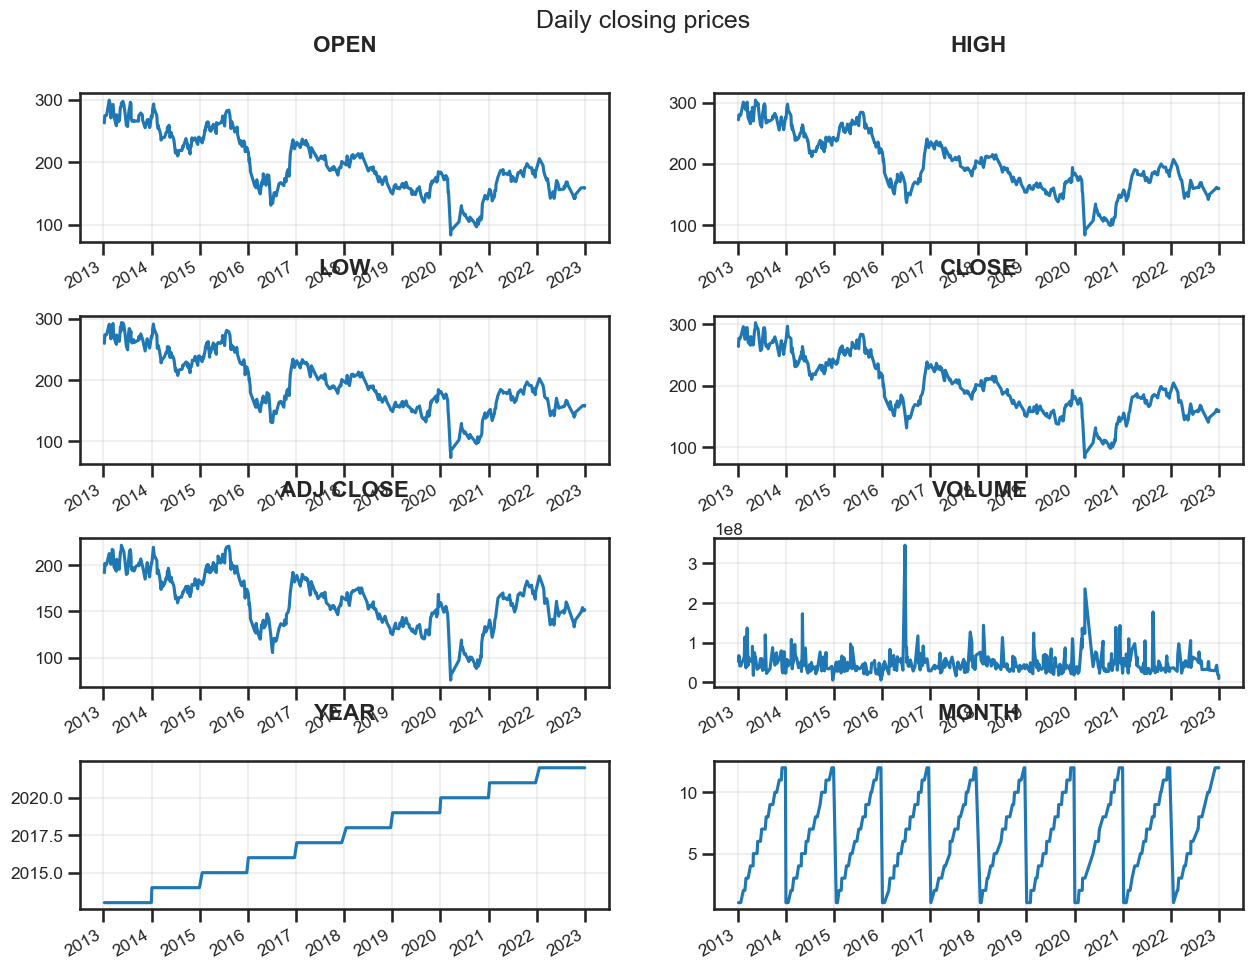

In [75]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Daily closing prices", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, ticker in enumerate(df):
    # add a new subplot iteratively
    #print(n, ticker)
    ax = plt.subplot(4, 2, n + 1)

    # # filter df and plot ticker on the new subplot axis
    df[[ticker]].plot(ax=ax)

    # chart formatting
    ax.set_title(ticker.upper())
    ax.get_legend().remove()
    ax.set_xlabel("")


In [20]:
df_sample = df[['Open', 'Close']] 

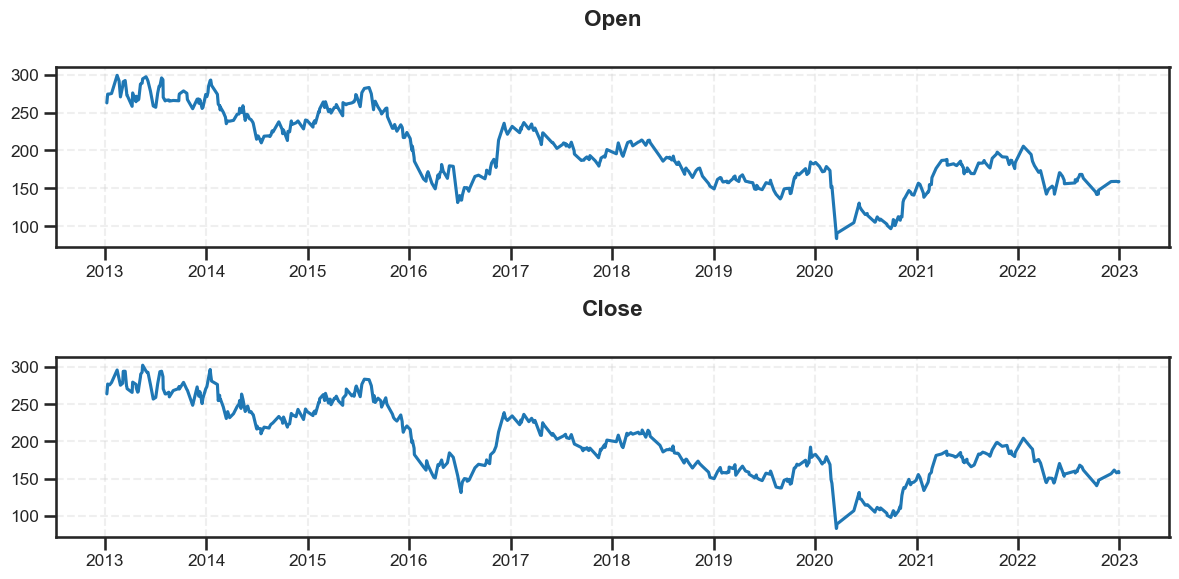

In [76]:
fig, axs = plt.subplots(2,1, figsize=(12,6))

for i , ax in enumerate(axs.ravel()):
    ax.plot(df_sample.iloc[:, i])
    ax.set_title(df_sample.columns[i])
    ax.grid(True, linestyle='dashed')

plt.tight_layout()
plt.show()

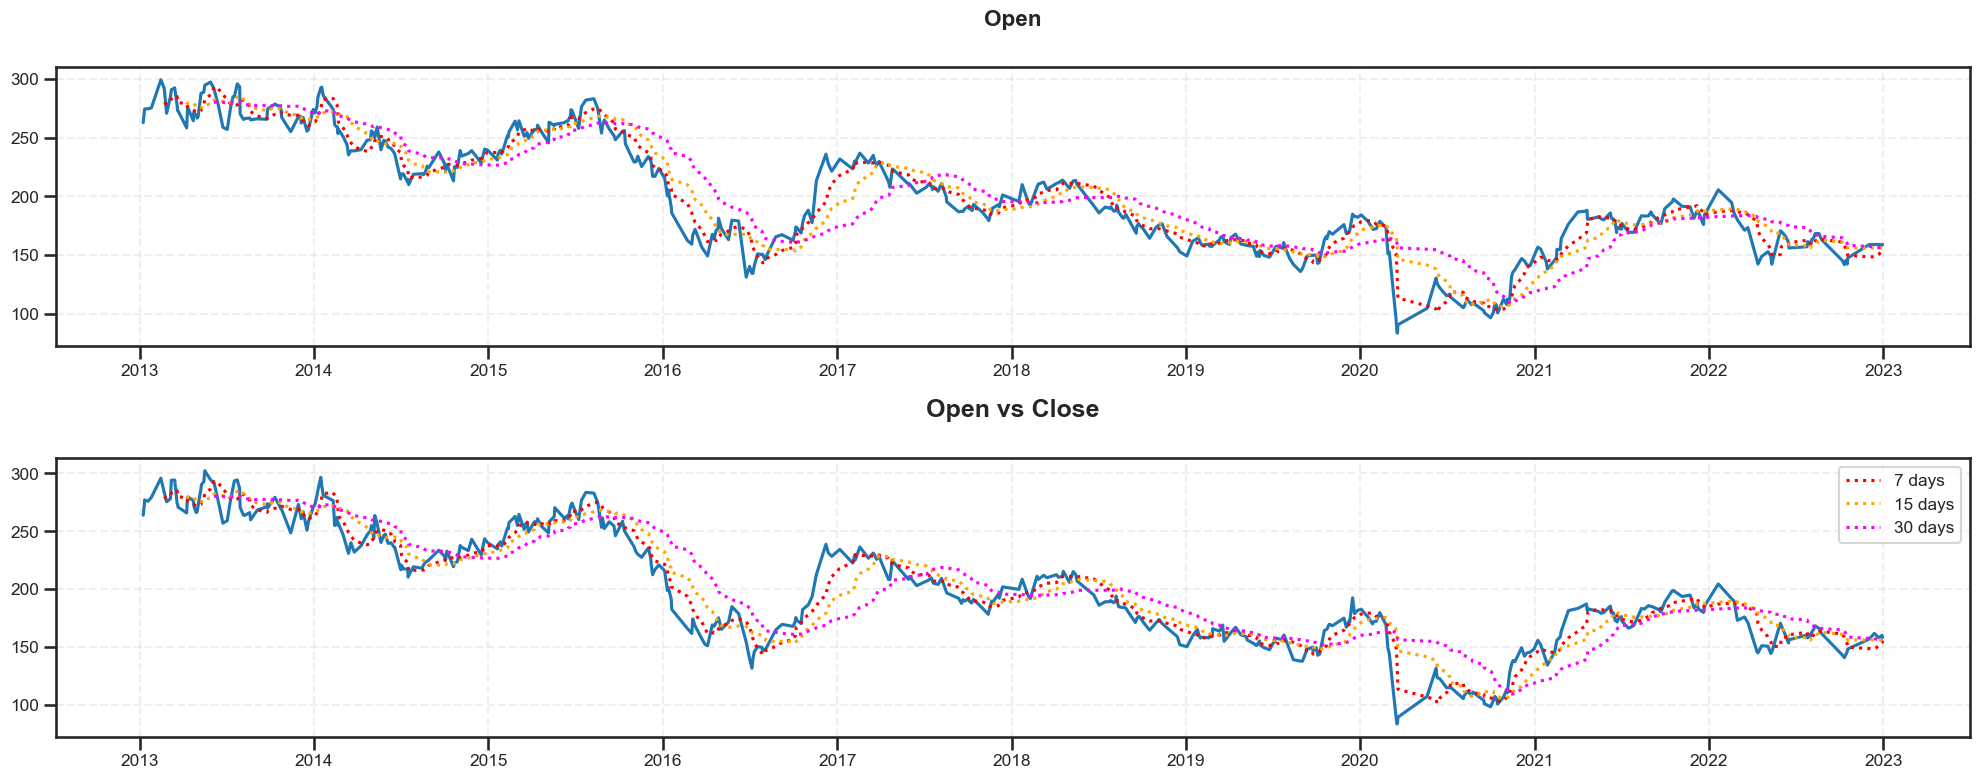

In [77]:
df_sample_mm_7 = df_sample.rolling(window=7).mean()
df_sample_mm_15 = df_sample.rolling(window=15).mean()
df_sample_mm_30 = df_sample.rolling(window=30).mean()

fig, axs = plt.subplots(2,1, figsize=(20,8))

for i , ax in enumerate(axs.ravel()):
    ax.plot(df_sample.iloc[:, i])
    ax.plot(df_sample_mm_7.iloc[:,1], ':', color='red',label='7 days')
    ax.plot(df_sample_mm_15.iloc[:,1], ':', color='orange', label='15 days')
    ax.plot(df_sample_mm_30.iloc[:,1], ':', color='magenta', label='30 days')
    ax.set_title(df_sample.columns[i])
    ax.grid(True, linestyle='dashed')

plt.title("Open vs Close", fontsize=18)
plt.legend()
plt.tight_layout()
plt.show()

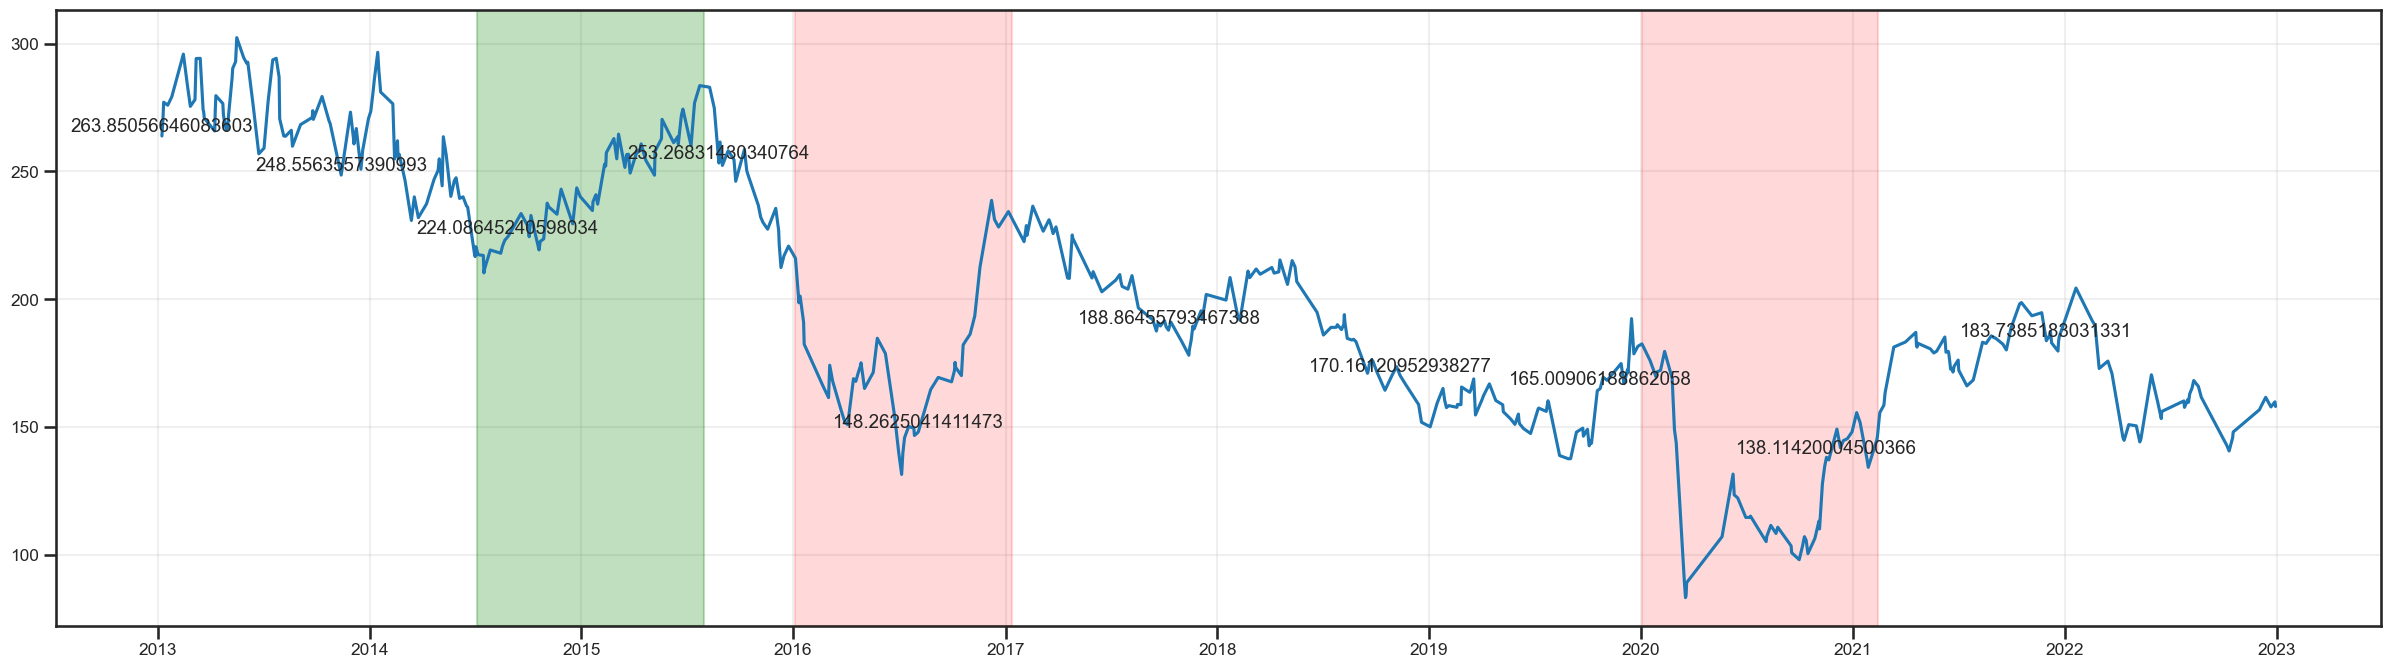

In [78]:
# Let's focus on Close 

plt.figure(figsize=(30, 8))
plt.plot(df.index, df['Close'],  linestyle='-') #marker='o'

start_date, end_date = pd.to_datetime('2016-01-05'), pd.to_datetime('2017-01-13')
plt.axvspan(start_date, end_date, color = 'red', alpha=0.15)

start_date1, end_date1 = pd.to_datetime('2020-01-03'), pd.to_datetime('2021-02-13')
plt.axvspan(start_date1, end_date1, color = 'red', alpha=0.15)

start_date2, end_date2 = pd.to_datetime('2014-07-05'), pd.to_datetime('2015-08-01')
plt.axvspan(start_date2, end_date2, color = 'green', alpha=0.25)
for index, row in df.iloc[::50].iterrows():
    plt.text(index, row['Close'], row['Close'], ha='center', va='bottom')


# plt.tick_params(axis='x', length=0)
# plt.box(False)
plt.grid(True)


plt.show()

In [36]:
df.groupby('Close')[['Open', 'High', 'Low', 'Adj Close', 'Volume']].agg(['min', 'max'])

Open                    High                     Low  \
                   min         max         min         max         min   
Close                                                                    
83.194732    84.041185   84.041185   85.758315   85.758315   80.560782   
83.977667    83.364484   83.364484   84.035001   84.035001   73.096540   
89.043723    90.516266   90.516266   91.763377   91.763377   84.461736   
89.611632    95.804162   95.804162   96.432488   96.432488   82.818841   
98.044807    96.449774   96.449774   99.405782   99.405782   95.719757   
...                ...         ...         ...         ...         ...   
294.260664  295.892753  295.892753  297.826489  297.826489  275.590857   
294.486115  297.372689  297.372689  298.494517  298.494517  293.372756   
295.893459  299.269823  299.269823  300.674342  300.674342  291.191331   
296.606414  292.494212  292.494212  297.212233  297.212233  291.546840   
302.343419  294.621100  294.621100  303.875547  303.875547  293.746361   

                         Adj Close                    Volume                
                   max         min         max           min           max  
Close                                                                       
83.194732    80.560782   75.452266   75.452266  1.230460e+08  1.230460e+08  
83.977667    73.096540   75.773606   75.773606  1.819544e+08  1.819544e+08  
89.043723    84.461736   80.950714   80.950714  2.357192e+08  2.357192e+08  
89.611632    82.818841   80.310715   80.310715  1.368931e+08  1.368931e+08  
98.044807    95.719757   88.136802   88.136802  4.116785e+07  4.116785e+07  
...                ...         ...         ...           ...           ...  
294.260664  275.590857  217.196911  217.196911  3.313974e+07  3.313974e+07  
294.486115  293.372756  217.032777  217.032777  3.258330e+07  3.258330e+07  
295.893459  291.191331  212.925160  212.925160  5.724263e+07  5.724263e+07  
296.606414  291.546840  219.746029  219.746029  5.317349e+07  5.317349e+07  
302.343419  293.746361  221.961739  221.961739  6.362870e+07  6.362870e+07  

[494 rows x 10 columns]

# Data Modeling

In [37]:
from statsmodels.tsa.arima.model import ARIMA